### d) Análisis Exploratorio de Datos (EDA) (10 puntos)

* Genere al menos 3 visualizaciones relevantes que proporcionen insights sobre los datos.
* Calcule estadísticas descriptivas pertinentes.
* Identifique y comente sobre patrones o tendencias interesantes en los datos.

In [1]:
# Importanciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mplsoccer import Pitch
from scipy.spatial import ConvexHull
from matplotlib.font_manager import FontProperties
import matplotlib.gridspec as gridspec


In [2]:
# Cargar el archivo CSV desde la misma carpeta de la notebook
df_eventos = pd.read_csv('eventos.csv')

df_eventos.head()

/var/folders/cm/p9cytb0d0vnfhdcstzncydc80000gn/T/ipykernel_3530/1387740821.py:2: DtypeWarning: Columns (20,21,22,23,36,37,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eventos = pd.read_csv('eventos.csv')


,eventId,expandedMinute,id,isTouch,minute,outcomeType,period,second,teamId,type,...,CaptainPlayerId,TeamFormation,InvolvedPlayers,Foul,player_id,player_name,formation_slot,jersey_number,teamName,match
0,2,0,2.721835e+09,False,0,Successful,FirstHalf,0.0,87,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,Juventus 3 - 1 PSV Eindhoven
1,2,0,2.721835e+09,False,0,Successful,FirstHalf,0.0,87,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,Juventus 3 - 1 PSV Eindhoven
2,2,0,2.721835e+09,False,0,Successful,FirstHalf,0.0,87,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,Juventus 3 - 1 PSV Eindhoven
3,2,0,2.721835e+09,False,0,Successful,FirstHalf,0.0,87,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Juventus,Juventus 3 - 1 PSV Eindhoven
4,2,0,2.721835e+09,False,0,Successful,FirstHalf,0.0,129,Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PSV Eindhoven,Juventus 3 - 1 PSV Eindhoven


# *Vamos a hacer un análisis exclusivo de dos equipos que se van a enfrentar en la próxima eliminatoria de Champions. Arsenal - Real Madrid. Vamos a ver datos de ambos equipos para ver relevancias y patrones que puedan ser claves en la eliminatoría.*


In [3]:
# Primero vamos a sacar un dataframe de solamente estos dos equipos.

df_arsenalmadrid = df_eventos[df_eventos['teamName'].isin(['Arsenal', 'Real Madrid'])]
df_arsenalmadrid.head()
df_arsenalmadrid.to_csv('arsenal_madrid.csv', index=False)

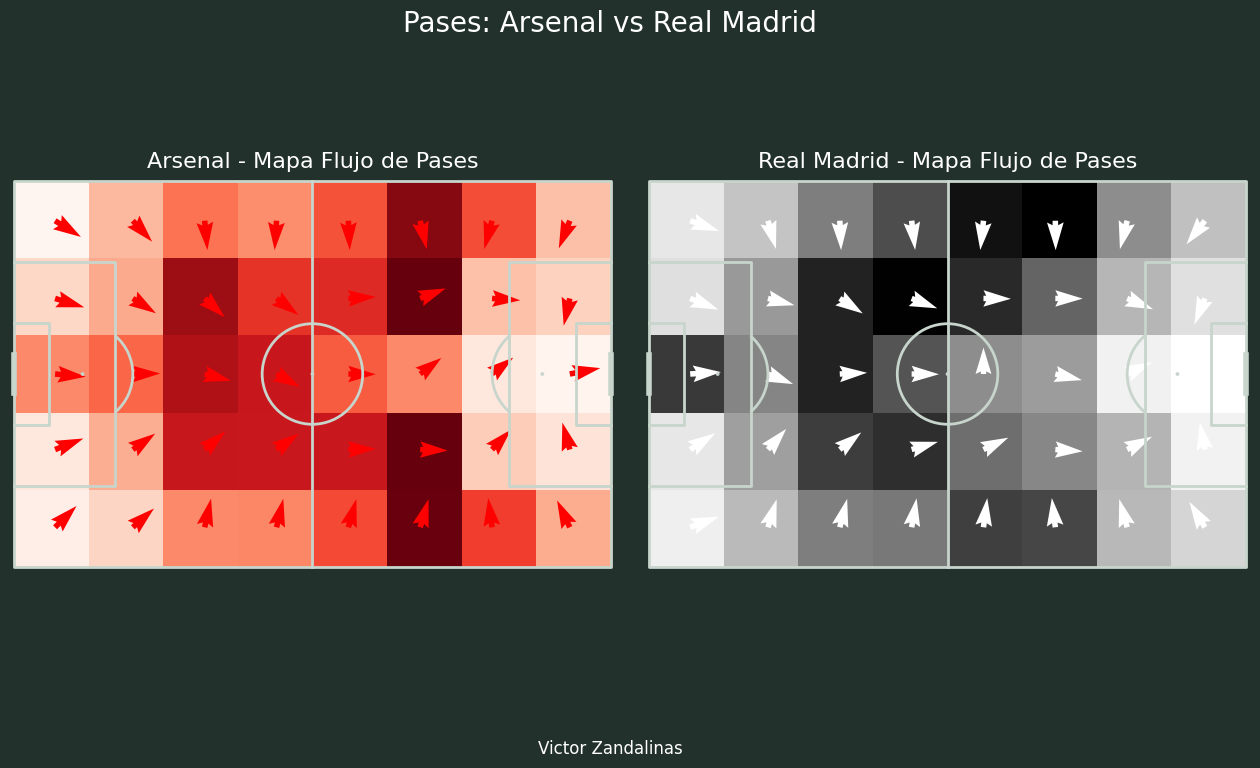

In [4]:
# Primero filtramos df_arsenalmadrid para obtener solo los pases
df_pass = df_arsenalmadrid[df_arsenalmadrid['type'] == 'Pass'].copy()

# Separamos los dataframes para cada equipo
df_arsenal = df_pass[df_pass['teamName'] == 'Arsenal'].copy()
df_madrid = df_pass[df_pass['teamName'] == 'Real Madrid'].copy()


# Definimos los bins para el heatmap y flowmap
bins = (8, 5)

# Configuración del pitch
pitch = Pitch(pitch_type='opta', pad_bottom=1, pad_top=1,
              pad_left=1, pad_right=1,
              line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')

# Creamos una figura con 2 subplots (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
fig.set_facecolor('#22312b')

# Ajustamos el layout
plt.subplots_adjust(wspace=0.05)

# Primer subplot para Arsenal (rojo)
ax1 = axs[0]
pitch.draw(ax=ax1)
bs_heatmap_arsenal = pitch.bin_statistic(df_arsenal.x, df_arsenal.y, statistic='count', bins=bins)
hm_arsenal = pitch.heatmap(bs_heatmap_arsenal, ax=ax1, cmap='Reds')
fm_arsenal = pitch.flow(df_arsenal.x, df_arsenal.y, df_arsenal.endX, df_arsenal.endY,
                       color='red', arrow_type='same',
                       arrow_length=5, bins=bins, ax=ax1)
ax1.set_title('Arsenal - Mapa Flujo de Pases', color='white', fontsize=16)

# Segundo subplot para Real Madrid (blanco)
ax2 = axs[1]
pitch.draw(ax=ax2)
bs_heatmap_madrid = pitch.bin_statistic(df_madrid.x, df_madrid.y, statistic='count', bins=bins)
hm_madrid = pitch.heatmap(bs_heatmap_madrid, ax=ax2, cmap='Greys')
fm_madrid = pitch.flow(df_madrid.x, df_madrid.y, df_madrid.endX, df_madrid.endY,
                      color='white', arrow_type='same',
                      arrow_length=5, bins=bins, ax=ax2)
ax2.set_title('Real Madrid - Mapa Flujo de Pases', color='white', fontsize=16)

# Ajustamos el título principal
fig.suptitle('Pases: Arsenal vs Real Madrid', 
            fontsize=20, color='white', y=0.95)

# Añadimos una nota de pie
fig.text(0.5, 0.02, 'Victor Zandalinas', ha='center', color='white', fontsize=12)

plt.show()

NameError: name 'FontManager' is not defined

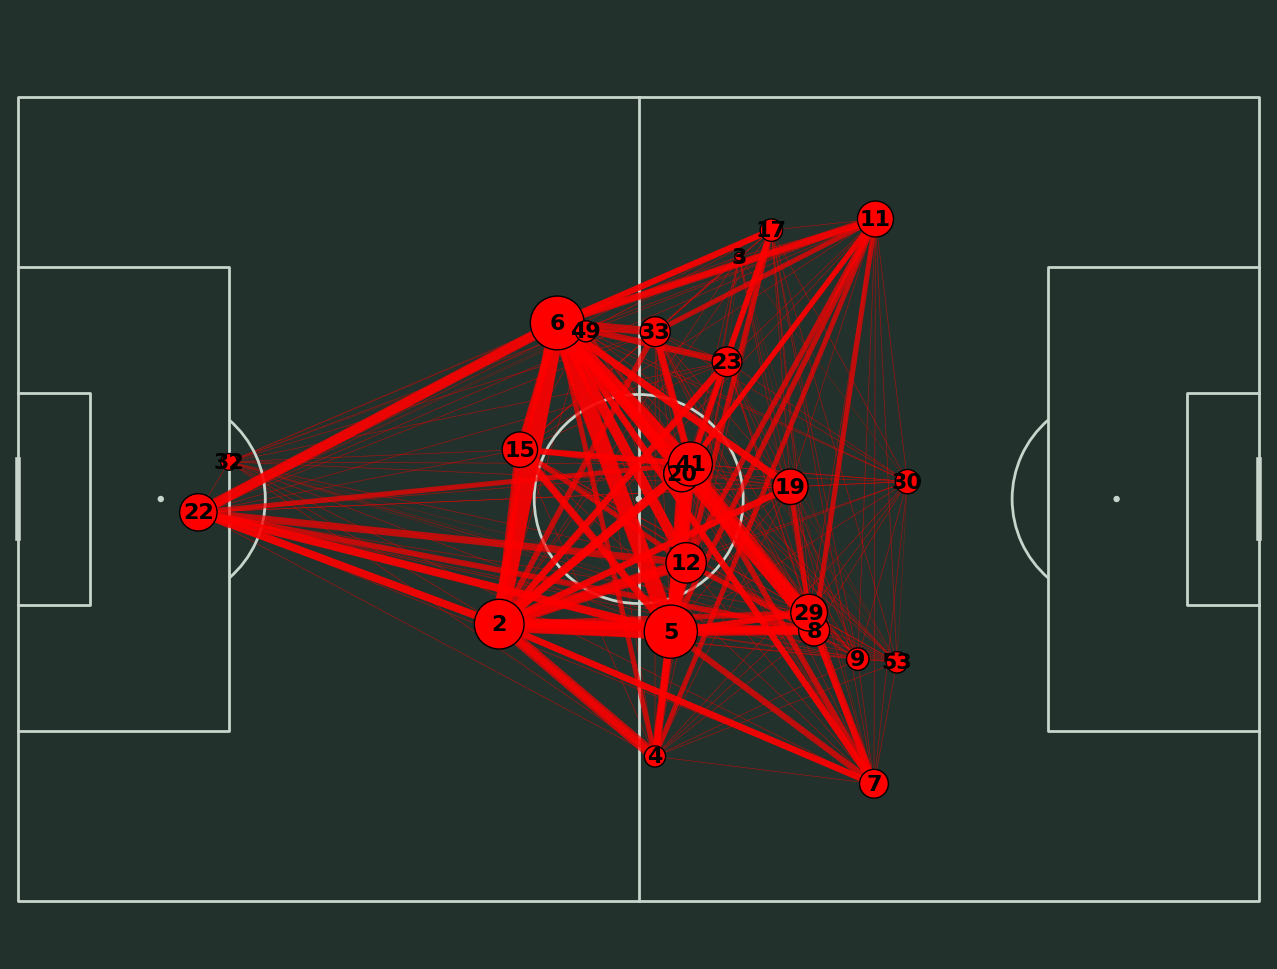

In [5]:
# Filtrar los pases del DataFrame df_arsenalmadrid
df_pass = df_arsenalmadrid[df_arsenalmadrid['type'] == 'Pass'].copy()

# Equipos a visualizar
teams = ['Arsenal', 'Real Madrid']
colors = ['red', 'white']

# Crear una figura para cada equipo usando pitch.grid
for team_idx, TEAM in enumerate(teams):
    team_passes = df_pass[df_pass['teamName'] == TEAM]
    
    if len(team_passes) == 0:
        print(f"No hay datos de pases para {TEAM}")
        continue
    
    # Configura el pitch
    pitch = Pitch(pitch_type='opta', pad_bottom=1, pad_top=1,
                  pad_left=1, pad_right=1,
                  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
    
    # Crea la estructura de la figura con grid
    fig, axs = pitch.grid(figheight=10, title_height=0.08, endnote_space=0,
                          axis=False, title_space=0, grid_height=0.82, endnote_height=0.05)
    
    fig.set_facecolor("#22312b")
    
    # Definir el color del equipo actual
    color = colors[team_idx]
    
    # Determinamos el oponente
    OPPONENT = teams[1] if TEAM == teams[0] else teams[0]
    
    # Calcular las ubicaciones promedio de los jugadores por jersey_number
    average_locs = team_passes.groupby('jersey_number').agg({'x': 'mean', 'y': 'mean'}).reset_index()
    average_locs = average_locs.set_index('jersey_number')
    
    # Contar los pases realizados por cada jugador
    pass_counts = team_passes.groupby('jersey_number').size().reset_index()
    pass_counts.columns = ['jersey_number', 'count']
    
    # Combinar ubicaciones y conteos
    average_locs_and_count = average_locs.merge(pass_counts, left_index=True, right_on='jersey_number')
    average_locs_and_count = average_locs_and_count.set_index('jersey_number')
    
    # Normalizar el tamaño de los marcadores
    max_count = average_locs_and_count['count'].max()
    average_locs_and_count['marker_size'] = average_locs_and_count['count'] / max_count * 1500
    
    # Crear un diccionario para mapear jersey_number a ubicaciones
    location_dict = dict(zip(average_locs_and_count.index, zip(average_locs_and_count.x, average_locs_and_count.y)))
    
    # Crear secuencia para identificar pases entre jugadores
    team_passes_sorted = team_passes.sort_values(['minute', 'second']).reset_index(drop=True)
    team_passes_sorted['next_player'] = team_passes_sorted['jersey_number'].shift(-1)
    team_passes_sorted['valid_sequence'] = (team_passes_sorted['next_player'].notna()) & (team_passes_sorted['next_player'] != team_passes_sorted['jersey_number'])
    
    # Filtrar solo secuencias válidas
    valid_sequences = team_passes_sorted[team_passes_sorted['valid_sequence']]
    
    # Crear un dataframe de pases entre jugadores
    passes_between = valid_sequences.groupby(['jersey_number', 'next_player']).size().reset_index()
    passes_between.columns = ['jersey_number', 'pass_recipient', 'pass_count']
    
    # Ordenar por número de pases (de mayor a menor)
    passes_between = passes_between.sort_values('pass_count', ascending=False)
    
    # Filtrar conexiones: mostrar solo las más significativas
    # Definimos un umbral (por ejemplo, top 20% de las conexiones)
    if len(passes_between) > 0:
        min_count = passes_between['pass_count'].quantile(0.8)  # Solo el top 20% más frecuentes serán gruesas
        passes_between['is_significant'] = passes_between['pass_count'] >= min_count
    else:
        passes_between['is_significant'] = False
    
    # Normalizar el ancho de las líneas con dos escalas diferentes
    max_line_width = passes_between['pass_count'].max()
    
    # Asignar ancho: líneas significativas más gruesas, resto más finas
    passes_between['width'] = np.where(
        passes_between['is_significant'],
        (passes_between['pass_count'] / max_line_width) * 12,  # Líneas significativas: más gruesas
        0.5  # Líneas menos importantes: finas y uniformes
    )
    
    # Añadir coordenadas de inicio y fin para las líneas
    passes_between['x'] = passes_between['jersey_number'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[0])
    passes_between['y'] = passes_between['jersey_number'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[1])
    passes_between['x_end'] = passes_between['pass_recipient'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[0])
    passes_between['y_end'] = passes_between['pass_recipient'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[1])
    
    # Eliminar conexiones con valores NaN
    passes_between = passes_between.dropna(subset=['x', 'y', 'x_end', 'y_end'])
    
    # Dibujar primero las líneas no significativas (para que queden debajo)
    non_significant = passes_between[~passes_between['is_significant']]
    if len(non_significant) > 0:
        pass_lines = pitch.lines(non_significant.x, non_significant.y,
                                non_significant.x_end, non_significant.y_end, 
                                lw=non_significant.width,
                                color=color, alpha=0.3, zorder=1, ax=axs['pitch'])
    
    # Ahora dibujamos las líneas significativas encima
    significant = passes_between[passes_between['is_significant']]
    if len(significant) > 0:
        pass_lines = pitch.lines(significant.x, significant.y,
                                significant.x_end, significant.y_end, 
                                lw=significant.width,
                                color=color, alpha=0.7, zorder=2, ax=axs['pitch'])
    
    # Dibujar los nodos (jugadores)
    pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                              s=average_locs_and_count.marker_size,
                              color=color, edgecolors='black', linewidth=1, 
                              alpha=1, zorder=3, ax=axs['pitch'])
    
    # Anotar los números de los jugadores
    for idx, row in average_locs_and_count.iterrows():
        pitch.annotate(str(int(idx)), xy=(row.x, row.y), c='black', va='center',
                      ha='center', size=16, weight='bold', zorder=4, ax=axs['pitch'])
    
    # Cargar fuente personalizada
    URL = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Regular.ttf'
    robotto_regular = FontManager(URL)
    
    # Agregar textos de pie y título
    axs['endnote'].text(1, 0.5, 'Victor Zandalinas', color='#c7d5cc',
                       va='center', ha='right', fontsize=15,
                       fontproperties=robotto_regular.prop)
    
    
    axs['title'].text(0.5, 0.25, f'Red de pases - {TEAM}', color='#c7d5cc',
                     va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)
    
    plt.show()

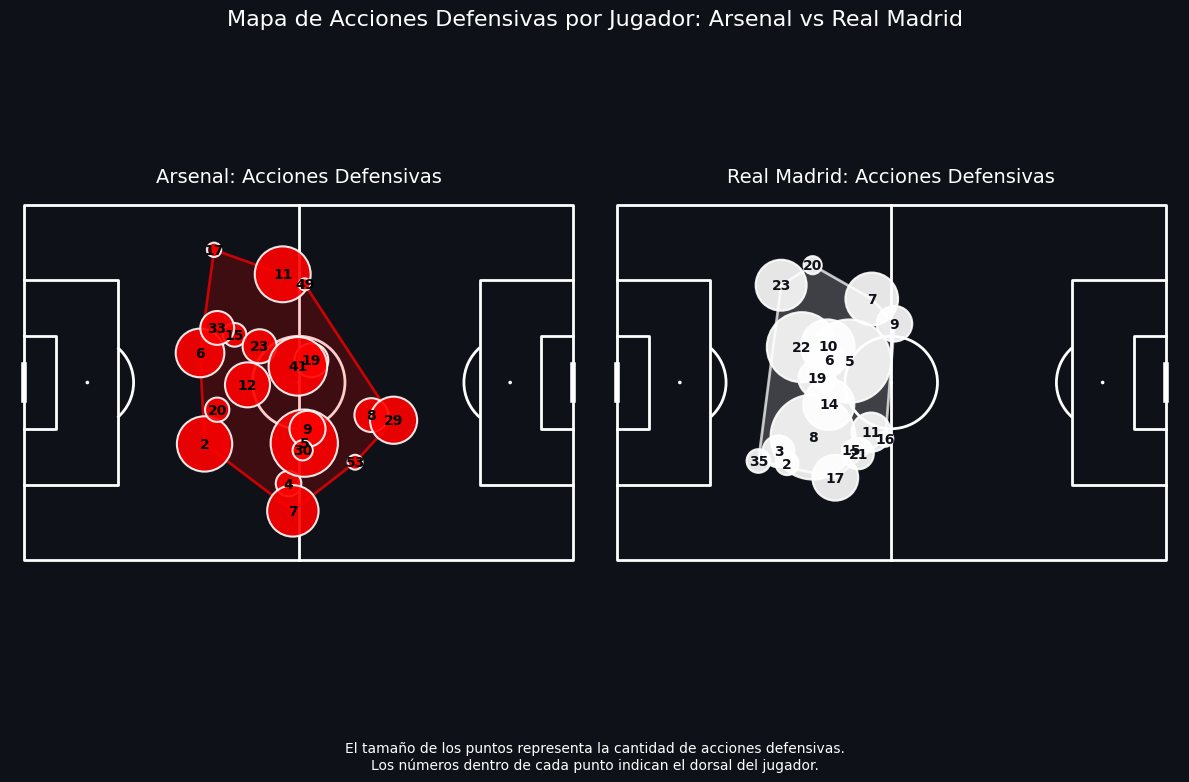

In [ ]:


def create_defensive_actions_hull(df, equipos=['Arsenal', 'Real Madrid']):
    """
    Crea un mapa de acciones defensivas utilizando convex hull
    para mostrar la posición media por número de camiseta (jersey_number)
    durante estas acciones.
    
    Args:
        df: DataFrame con los datos del Arsenal y Real Madrid
        equipos: Lista de equipos a analizar (por defecto Arsenal y Real Madrid)
        
    Returns:
        Figura de matplotlib con el campograma de acciones defensivas
    """
    # Definir color de fondo
    BACKGROUND_COLOR = '#0E1117'
    
    # Filtrar solo eventos defensivos seleccionados y formación diferente a 1
    eventos_defensivos = ['BlockedPass', 'Interception', 'BallRecovery']
    df_defensive = df[
        (df['type'].isin(eventos_defensivos)) & 
        (df['formation_slot'] > 1)  # Excluir porteros y asegurar valores > 1
    ]
    
    # Crear figura y axes para ambos equipos
    fig, axes = plt.subplots(1, 2, figsize=(12, 8), facecolor=BACKGROUND_COLOR)
    
    # Colores para cada equipo
    team_colors = {
        'Arsenal': '#FF0000',  # Rojo para Arsenal
        'Real Madrid': '#FFFFFF'  # Blanco para Real Madrid
    }
    
    for i, equipo in enumerate(equipos):
        ax = axes[i]
        
        # Filtrar datos para el equipo actual
        df_team = df_defensive[df_defensive['teamName'] == equipo]
        
        # Configurar el campo tipo opta
        pitch = Pitch(
            pitch_type='opta',
            axis=False, 
            label=False,  
            pitch_color='none',
            line_color='white',
            stripe=False
        )
        
        # Dibujar el campo
        pitch.draw(ax=ax)
        
        # Cambiar color de fondo del axis
        ax.set_facecolor(BACKGROUND_COLOR)
        
        if len(df_team) > 0:
            # Crear copia del dataframe del equipo
            df_team_copy = df_team.copy()
            
            # Procesar los datos para obtener las posiciones medias por jersey_number
            player_means = []
            
            # Agrupar por jersey_number
            player_groups = df_team_copy.groupby('jersey_number')
            
            for jersey, group in player_groups:
                # Obtener posición media para este jersey_number
                x_mean = group['x'].mean()
                y_mean = group['y'].mean()
                count = len(group)  # Cantidad de eventos para este jugador
                
                # Verificar que las medias sean válidas
                if not (pd.isna(x_mean) or pd.isna(y_mean)):
                    # Añadir posición media a la lista
                    player_means.append({
                        'jersey_number': jersey,
                        'x': x_mean,
                        'y': y_mean,
                        'count': count
                    })
            
            # Convertir a DataFrame para facilitar el procesamiento
            df_players = pd.DataFrame(player_means)
            
            if len(df_players) < 3:
                ax.text(50, 50, "No hay suficientes jugadores para crear un convex hull",
                      ha='center', va='center', color='white', fontsize=12)
            else:
                # Dibujar puntos para cada jugador con tamaño basado en cantidad de eventos
                sizes = df_players['count'] * 2 + 50  # Ajustar escala para mejor visualización
                
                # Dibujar solo los puntos medios (sin los puntos individuales de acciones)
                ax.scatter(
                    df_players['x'], 
                    df_players['y'],
                    s=sizes,  # Tamaño variable según cantidad de eventos
                    color=team_colors[equipo],  
                    alpha=0.9,
                    edgecolors='white',
                    linewidth=1.5,
                    zorder=3  # Por encima del hull
                )
                
                # Añadir etiquetas con los jersey_number dentro de cada punto
                for _, row in df_players.iterrows():
                    # Convertir a entero para eliminar decimales si es un número
                    if isinstance(row['jersey_number'], (int, float)):
                        jersey_text = str(int(row['jersey_number']))
                    else:
                        jersey_text = str(row['jersey_number'])
                        
                    ax.text(
                        row['x'], row['y'], 
                        jersey_text, 
                        color='black' if equipo == 'Arsenal' else '#0E1117',  # Contraste con el color del punto
                        ha='center', 
                        va='center',
                        fontsize=10,
                        fontweight='bold',
                        zorder=4
                    )
                
                # Crear el convex hull con todos los puntos
                puntos = df_players[['x', 'y']].values
                hull = ConvexHull(puntos)
                
                # Colorear el área del hull
                hull_points = puntos[hull.vertices]
                ax.fill(
                    hull_points[:, 0], 
                    hull_points[:, 1], 
                    color=team_colors[equipo],
                    alpha=0.2,  
                    zorder=1  # Para que esté por debajo de los puntos
                )

                # Dibujar las líneas del hull
                for simplex in hull.simplices:
                    ax.plot(
                        puntos[simplex, 0], 
                        puntos[simplex, 1], 
                        color=team_colors[equipo],
                        linestyle='-',
                        linewidth=2,
                        alpha=0.7,
                        zorder=2  
                    )
            
            # Añadir título al eje
            ax.set_title(f"{equipo}: Acciones Defensivas", color='white', fontsize=14)
        else:
            ax.text(50, 50, f"No hay datos para {equipo}",
                  ha='center', va='center', color='white', fontsize=12)
    
    # Añadir título general
    fig.suptitle("Mapa de Acciones Defensivas por Jugador: Arsenal vs Real Madrid", 
                color='white', fontsize=16, y=0.98)
    
    # Añadir leyenda para tipos de eventos
    legend_elements = []
    for evento in eventos_defensivos:
        legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', 
                               markerfacecolor='gray', markersize=8, label=evento))
    
    # Añadir nota explicativa sobre el contenido de los puntos
    fig.text(0.5, 0.03, "El tamaño de los puntos representa la cantidad de acciones defensivas.\nLos números dentro de cada punto indican el dorsal del jugador.",
             ha='center', color='white', fontsize=10)
    
    
    plt.tight_layout(rect=[0, 0.12, 1, 0.95])
    return fig

# Para usar esta función:
fig = create_defensive_actions_hull(df_arsenalmadrid)
plt.show()

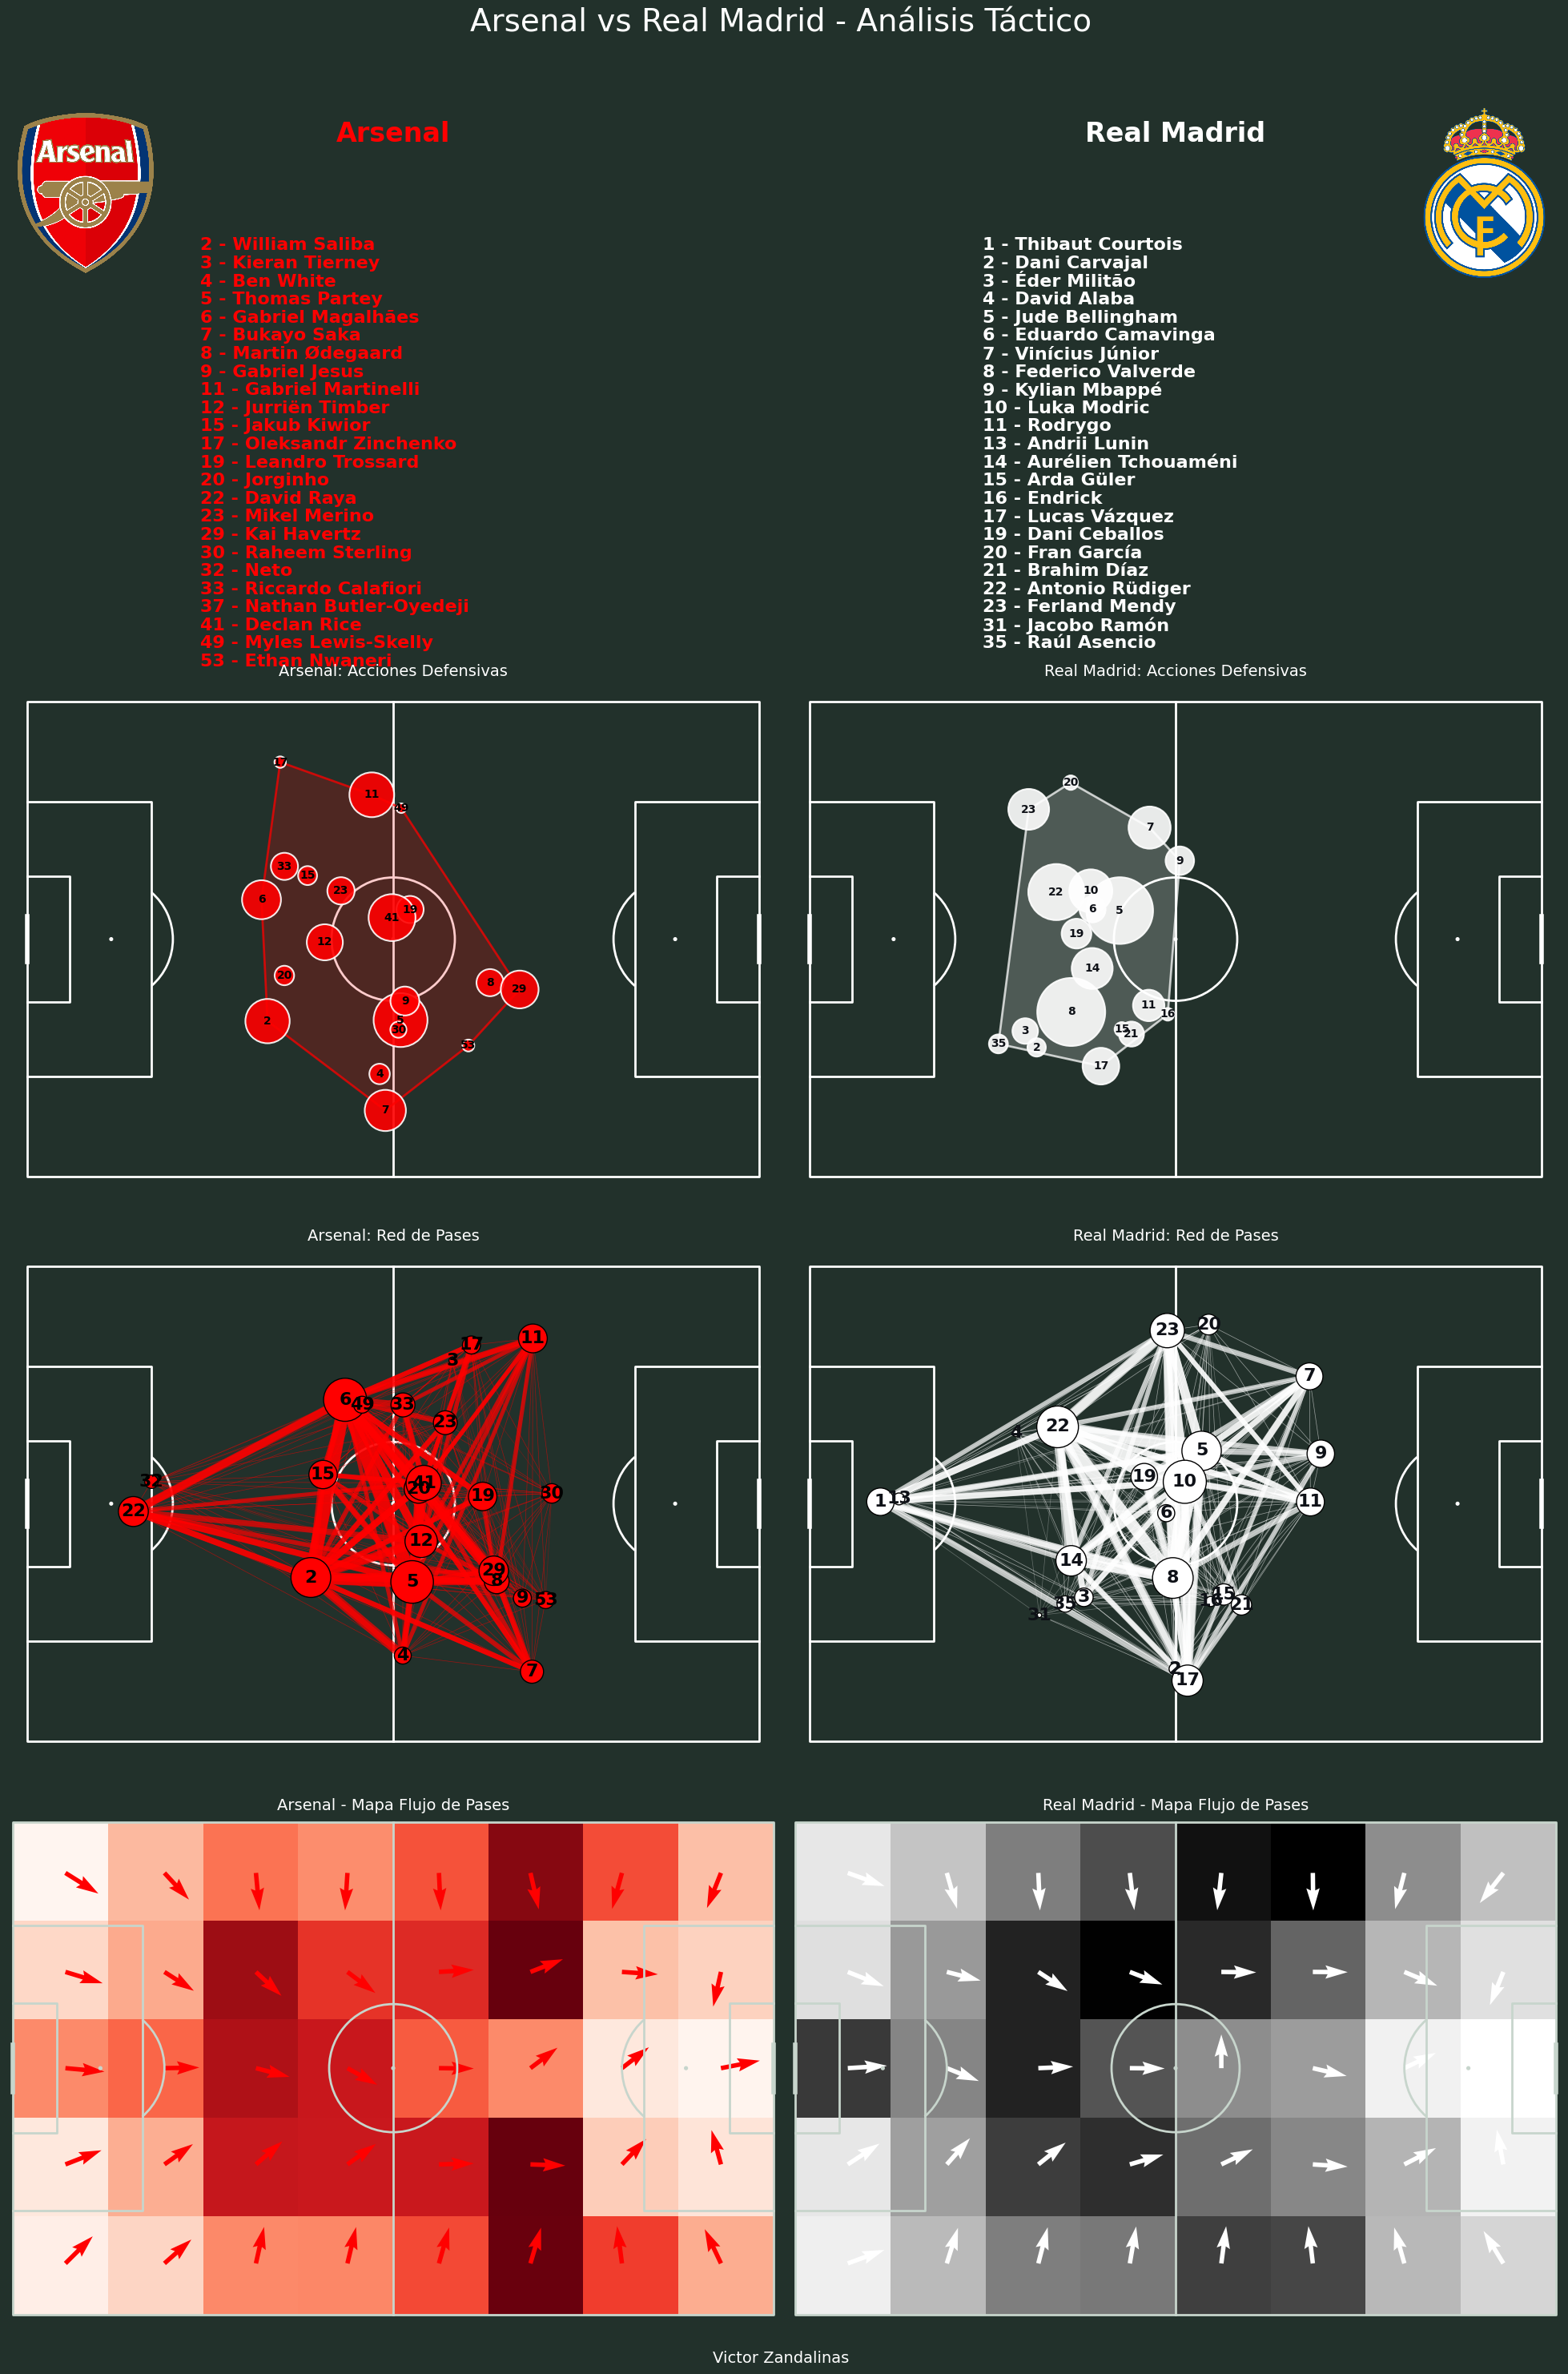

In [ ]:

def create_combined_visualization(df_arsenalmadrid):
    """
    Crea una visualización combinada con 4 filas:
    1. Lista de jugadores con dorsales y escudos
    2. Mapas de acciones defensivas
    3. Redes de pases
    4. Flow maps de pases
    
    Args:
        df_arsenalmadrid: DataFrame con los datos de ambos equipos
        
    Returns:
        Figura de matplotlib con todas las visualizaciones
    """
    # Definir color de fondo
    BACKGROUND_COLOR = '#22312b'
    
    # Equipos y colores
    equipos = ['Arsenal', 'Real Madrid']
    colors = ['#FF0000', '#FFFFFF']  # Rojo para Arsenal, Blanco para Real Madrid
    
    # Crear figura grande con GridSpec para control preciso
    fig = plt.figure(figsize=(20, 30), facecolor=BACKGROUND_COLOR)
    gs = gridspec.GridSpec(4, 2, height_ratios=[1, 1, 1, 1])
    
    # ----- 1. PRIMERA FILA: LISTA DE JUGADORES -----
    
    # Extraer información de jugadores únicos para cada equipo
    arsenal_players = df_arsenalmadrid[df_arsenalmadrid['teamName'] == 'Arsenal'][['player_name', 'jersey_number']].drop_duplicates()
    madrid_players = df_arsenalmadrid[df_arsenalmadrid['teamName'] == 'Real Madrid'][['player_name', 'jersey_number']].drop_duplicates()
    
    # Filtrar jugadores sin dorsal (N/A)
    arsenal_players = arsenal_players[arsenal_players['jersey_number'].notna()].reset_index(drop=True)
    madrid_players = madrid_players[madrid_players['jersey_number'].notna()].reset_index(drop=True)
    
    # Ordenar por número de camiseta
    arsenal_players = arsenal_players.sort_values('jersey_number').reset_index(drop=True)
    madrid_players = madrid_players.sort_values('jersey_number').reset_index(drop=True)
    
    # Crear ejes para la lista de jugadores
    ax_arsenal_list = fig.add_subplot(gs[0, 0])
    ax_madrid_list = fig.add_subplot(gs[0, 1])
    
    # Configurar fondo de los ejes
    ax_arsenal_list.set_facecolor(BACKGROUND_COLOR)
    ax_madrid_list.set_facecolor(BACKGROUND_COLOR)
    
    # Cargar imágenes de escudos
    try:
        arsenal_logo = mpimg.imread('logos/escudo_arsenal.png')
        madrid_logo = mpimg.imread('logos/escudo_realmadrid.png')
        
        # Añadir escudo del Arsenal
        imagebox_arsenal = OffsetImage(arsenal_logo, zoom=0.14)
        ab_arsenal = AnnotationBbox(imagebox_arsenal, (0.1, 0.85), 
                                   frameon=False, box_alignment=(0.5, 0.5))
        ax_arsenal_list.add_artist(ab_arsenal)
        
        # Añadir escudo del Real Madrid
        imagebox_madrid = OffsetImage(madrid_logo, zoom=0.20)
        ab_madrid = AnnotationBbox(imagebox_madrid, (0.9, 0.85), 
                                  frameon=False, box_alignment=(0.5, 0.5))
        ax_madrid_list.add_artist(ab_madrid)
    except Exception as e:
        print(f"Error al cargar los escudos: {e}")
        # Si no se pueden cargar las imágenes, añadir texto como alternativa
        ax_arsenal_list.text(0.5, 0.85, "ARSENAL FC", fontsize=24, ha='center', 
                va='center', color='red', weight='bold')
        ax_madrid_list.text(0.5, 0.85, "REAL MADRID CF", fontsize=24, ha='center', 
                va='center', color='white', weight='bold')
    
    # Añadir título a cada columna
    ax_arsenal_list.text(0.5, 0.95, "Arsenal", fontsize=24, ha='center', color='red', weight='bold')
    ax_madrid_list.text(0.5, 0.95, "Real Madrid", fontsize=24, ha='center', color='white', weight='bold')
    
    # Añadir jugadores de Arsenal
    y_start_arsenal = 0.75
    y_gap = 0.035  # Espacio entre jugadores
    
    for i, (_, player) in enumerate(arsenal_players.iterrows()):
        jersey = int(player['jersey_number'])
        name = player['player_name'] if pd.notna(player['player_name']) else "Desconocido"
        
        y_pos = y_start_arsenal - (i * y_gap)
        # Añadir número de camiseta y nombre juntos, con tamaño de fuente más grande
        ax_arsenal_list.text(0.25, y_pos, f"{jersey} - {name}", fontsize=16, ha='left', 
                va='center', color=colors[0], weight='bold')
    
    # Añadir jugadores de Real Madrid
    y_start_madrid = 0.75
    
    for i, (_, player) in enumerate(madrid_players.iterrows()):
        jersey = int(player['jersey_number'])
        name = player['player_name'] if pd.notna(player['player_name']) else "Desconocido"
        
        y_pos = y_start_madrid - (i * y_gap)
        # Añadir número de camiseta y nombre juntos, con tamaño de fuente más grande
        ax_madrid_list.text(0.25, y_pos, f"{jersey} - {name}", fontsize=16, ha='left', 
                va='center', color=colors[1], weight='bold')
    
    # Eliminar ejes
    ax_arsenal_list.axis('off')
    ax_madrid_list.axis('off')
    
    # ----- 2. SEGUNDA FILA: MAPAS DE ACCIONES DEFENSIVAS -----
    
    # Crear ejes para los mapas de acciones defensivas
    ax_arsenal_def = fig.add_subplot(gs[1, 0])
    ax_madrid_def = fig.add_subplot(gs[1, 1])
    
    # Configurar fondo de los ejes
    ax_arsenal_def.set_facecolor(BACKGROUND_COLOR)
    ax_madrid_def.set_facecolor(BACKGROUND_COLOR)
    
    # Filtrar solo eventos defensivos seleccionados y formación diferente a 1
    eventos_defensivos = ['BlockedPass', 'Interception', 'BallRecovery']
    df_defensive = df_arsenalmadrid[
        (df_arsenalmadrid['type'].isin(eventos_defensivos)) & 
        (df_arsenalmadrid['formation_slot'] > 1)  # Excluir porteros y asegurar valores > 1
    ]
    
    # Procesar cada equipo para acciones defensivas
    for i, equipo in enumerate(equipos):
        ax = ax_arsenal_def if i == 0 else ax_madrid_def
        
        # Filtrar datos para el equipo actual
        df_team = df_defensive[df_defensive['teamName'] == equipo]
        
        # Configurar el campo tipo opta
        pitch = Pitch(
            pitch_type='opta',
            axis=False, 
            label=False,  
            pitch_color='none',
            line_color='white',
            stripe=False
        )
        
        # Dibujar el campo
        pitch.draw(ax=ax)
        
        if len(df_team) > 0:
            # Procesar los datos para obtener las posiciones medias por jersey_number
            player_means = []
            
            # Agrupar por jersey_number
            player_groups = df_team.groupby('jersey_number')
            
            for jersey, group in player_groups:
                # Obtener posición media para este jersey_number
                x_mean = group['x'].mean()
                y_mean = group['y'].mean()
                count = len(group)  # Cantidad de eventos para este jugador
                
                # Verificar que las medias sean válidas
                if not (pd.isna(x_mean) or pd.isna(y_mean)):
                    # Añadir posición media a la lista
                    player_means.append({
                        'jersey_number': jersey,
                        'x': x_mean,
                        'y': y_mean,
                        'count': count
                    })
            
            # Convertir a DataFrame para facilitar el procesamiento
            df_players = pd.DataFrame(player_means)
            
            if len(df_players) >= 3:
                # Dibujar puntos para cada jugador con tamaño basado en cantidad de eventos
                sizes = df_players['count'] * 2 + 50  # Ajustar escala para mejor visualización
                
                # Dibujar solo los puntos medios
                ax.scatter(
                    df_players['x'], 
                    df_players['y'],
                    s=sizes,  # Tamaño variable según cantidad de eventos
                    color=colors[i],  
                    alpha=0.9,
                    edgecolors='white',
                    linewidth=1.5,
                    zorder=3  # Por encima del hull
                )
                
                # Añadir etiquetas con los jersey_number dentro de cada punto
                for _, row in df_players.iterrows():
                    # Convertir a entero para eliminar decimales si es un número
                    if isinstance(row['jersey_number'], (int, float)):
                        jersey_text = str(int(row['jersey_number']))
                    else:
                        jersey_text = str(row['jersey_number'])
                        
                    ax.text(
                        row['x'], row['y'], 
                        jersey_text, 
                        color='black' if equipo == 'Arsenal' else '#0E1117',  # Contraste con el color del punto
                        ha='center', 
                        va='center',
                        fontsize=10,
                        fontweight='bold',
                        zorder=4
                    )
                
                # Crear el convex hull con todos los puntos
                puntos = df_players[['x', 'y']].values
                hull = ConvexHull(puntos)
                
                # Colorear el área del hull
                hull_points = puntos[hull.vertices]
                ax.fill(
                    hull_points[:, 0], 
                    hull_points[:, 1], 
                    color=colors[i],
                    alpha=0.2,  
                    zorder=1  # Para que esté por debajo de los puntos
                )

                # Dibujar las líneas del hull
                for simplex in hull.simplices:
                    ax.plot(
                        puntos[simplex, 0], 
                        puntos[simplex, 1], 
                        color=colors[i],
                        linestyle='-',
                        linewidth=2,
                        alpha=0.7,
                        zorder=2  
                    )
            
            # Añadir título al eje
            ax.set_title(f"{equipo}: Acciones Defensivas", color='white', fontsize=14)
        else:
            ax.text(50, 50, f"No hay datos para {equipo}",
                  ha='center', va='center', color='white', fontsize=12)
    
    # ----- 3. TERCERA FILA: REDES DE PASES -----
    
    # Crear ejes para las redes de pases
    ax_arsenal_passes = fig.add_subplot(gs[2, 0])
    ax_madrid_passes = fig.add_subplot(gs[2, 1])
    
    # Configurar fondo de los ejes
    ax_arsenal_passes.set_facecolor(BACKGROUND_COLOR)
    ax_madrid_passes.set_facecolor(BACKGROUND_COLOR)
    
    # Filtrar los pases del DataFrame
    df_pass = df_arsenalmadrid[df_arsenalmadrid['type'] == 'Pass'].copy()
    
    # Procesar cada equipo para redes de pases
    for i, equipo in enumerate(equipos):
        ax = ax_arsenal_passes if i == 0 else ax_madrid_passes
        
        # Filtrar datos para el equipo actual
        team_passes = df_pass[df_pass['teamName'] == equipo]
        
        if len(team_passes) > 0:
            # Configurar el campo
            pitch = Pitch(
                pitch_type='opta',
                axis=False, 
                label=False,  
                pitch_color='none',
                line_color='white',
                stripe=False
            )
            
            # Dibujar el campo
            pitch.draw(ax=ax)
            
            # Calcular las ubicaciones promedio de los jugadores por jersey_number
            average_locs = team_passes.groupby('jersey_number').agg({'x': 'mean', 'y': 'mean'}).reset_index()
            average_locs = average_locs.set_index('jersey_number')
            
            # Contar los pases realizados por cada jugador
            pass_counts = team_passes.groupby('jersey_number').size().reset_index()
            pass_counts.columns = ['jersey_number', 'count']
            
            # Combinar ubicaciones y conteos
            average_locs_and_count = average_locs.merge(pass_counts, left_index=True, right_on='jersey_number')
            average_locs_and_count = average_locs_and_count.set_index('jersey_number')
            
            # Normalizar el tamaño de los marcadores
            max_count = average_locs_and_count['count'].max()
            average_locs_and_count['marker_size'] = average_locs_and_count['count'] / max_count * 1500
            
            # Crear un diccionario para mapear jersey_number a ubicaciones
            location_dict = dict(zip(average_locs_and_count.index, zip(average_locs_and_count.x, average_locs_and_count.y)))
            
            # Crear secuencia para identificar pases entre jugadores
            team_passes_sorted = team_passes.sort_values(['minute', 'second']).reset_index(drop=True)
            team_passes_sorted['next_player'] = team_passes_sorted['jersey_number'].shift(-1)
            team_passes_sorted['valid_sequence'] = (team_passes_sorted['next_player'].notna()) & (team_passes_sorted['next_player'] != team_passes_sorted['jersey_number'])
            
            # Filtrar solo secuencias válidas
            valid_sequences = team_passes_sorted[team_passes_sorted['valid_sequence']]
            
            # Crear un dataframe de pases entre jugadores
            passes_between = valid_sequences.groupby(['jersey_number', 'next_player']).size().reset_index()
            passes_between.columns = ['jersey_number', 'pass_recipient', 'pass_count']
            
            # Ordenar por número de pases (de mayor a menor)
            passes_between = passes_between.sort_values('pass_count', ascending=False)
            
            # Filtrar conexiones: mostrar solo las más significativas
            if len(passes_between) > 0:
                min_count = passes_between['pass_count'].quantile(0.8)  # Solo el top 20% más frecuentes
                passes_between['is_significant'] = passes_between['pass_count'] >= min_count
            else:
                passes_between['is_significant'] = False
            
            # Normalizar el ancho de las líneas
            max_line_width = passes_between['pass_count'].max()
            
            # Asignar ancho: líneas significativas más gruesas, resto más finas
            passes_between['width'] = np.where(
                passes_between['is_significant'],
                (passes_between['pass_count'] / max_line_width) * 12,  # Líneas significativas: más gruesas
                0.5  # Líneas menos importantes: finas y uniformes
            )
            
            # Añadir coordenadas de inicio y fin para las líneas
            passes_between['x'] = passes_between['jersey_number'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[0])
            passes_between['y'] = passes_between['jersey_number'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[1])
            passes_between['x_end'] = passes_between['pass_recipient'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[0])
            passes_between['y_end'] = passes_between['pass_recipient'].map(lambda x: location_dict.get(x, (np.nan, np.nan))[1])
            
            # Eliminar conexiones con valores NaN
            passes_between = passes_between.dropna(subset=['x', 'y', 'x_end', 'y_end'])
            
            # Dibujar primero las líneas no significativas (para que queden debajo)
            non_significant = passes_between[~passes_between['is_significant']]
            if len(non_significant) > 0:
                pass_lines = pitch.lines(non_significant.x, non_significant.y,
                                        non_significant.x_end, non_significant.y_end, 
                                        lw=non_significant.width,
                                        color=colors[i], alpha=0.3, zorder=1, ax=ax)
            
            # Ahora dibujamos las líneas significativas encima
            significant = passes_between[passes_between['is_significant']]
            if len(significant) > 0:
                pass_lines = pitch.lines(significant.x, significant.y,
                                        significant.x_end, significant.y_end, 
                                        lw=significant.width,
                                        color=colors[i], alpha=0.7, zorder=2, ax=ax)
            
            # Dibujar los nodos (jugadores)
            pass_nodes = pitch.scatter(average_locs_and_count.x, average_locs_and_count.y,
                                      s=average_locs_and_count.marker_size,
                                      color=colors[i], edgecolors='black', linewidth=1, 
                                      alpha=1, zorder=3, ax=ax)
            
            # Anotar los números de los jugadores
            for idx, row in average_locs_and_count.iterrows():
                pitch.annotate(str(int(idx)), xy=(row.x, row.y), c='black' if i == 0 else '#0E1117', va='center',
                              ha='center', size=16, weight='bold', zorder=4, ax=ax)
            
            # Añadir título al eje
            ax.set_title(f"{equipo}: Red de Pases", color='white', fontsize=14)
        else:
            ax.text(50, 50, f"No hay datos para {equipo}",
                  ha='center', va='center', color='white', fontsize=12)
    
    # ----- 4. CUARTA FILA: FLOW MAPS DE PASES -----
    
    # Crear ejes para los flow maps
    ax_arsenal_flow = fig.add_subplot(gs[3, 0])
    ax_madrid_flow = fig.add_subplot(gs[3, 1])
    
    # Configurar fondo de los ejes
    ax_arsenal_flow.set_facecolor(BACKGROUND_COLOR)
    ax_madrid_flow.set_facecolor(BACKGROUND_COLOR)
    
    # Definir los bins para el heatmap y flowmap
    bins = (8, 5)
    
    # Filtrar los pases de cada equipo
    df_arsenal = df_pass[df_pass['teamName'] == 'Arsenal'].copy()
    df_madrid = df_pass[df_pass['teamName'] == 'Real Madrid'].copy()
    
    # Flow map para Arsenal
    pitch = Pitch(
        pitch_type='opta', 
        pad_bottom=1, pad_top=1,
        pad_left=1, pad_right=1,
        line_zorder=2, 
        line_color='#c7d5cc', 
        pitch_color='none'
    )
    
    # Dibujar campo para Arsenal
    pitch.draw(ax=ax_arsenal_flow)
    
    if len(df_arsenal) > 0:
        # Crear heatmap y flowmap para Arsenal
        bs_heatmap_arsenal = pitch.bin_statistic(df_arsenal.x, df_arsenal.y, statistic='count', bins=bins)
        hm_arsenal = pitch.heatmap(bs_heatmap_arsenal, ax=ax_arsenal_flow, cmap='Reds')
        fm_arsenal = pitch.flow(df_arsenal.x, df_arsenal.y, df_arsenal.endX, df_arsenal.endY,
                              color='red', arrow_type='same',
                              arrow_length=5, bins=bins, ax=ax_arsenal_flow)
        
        # Añadir título para Arsenal
        ax_arsenal_flow.set_title('Arsenal - Mapa Flujo de Pases', color='white', fontsize=14)
    else:
        ax_arsenal_flow.text(50, 50, "No hay datos de pases para Arsenal",
                          ha='center', va='center', color='white', fontsize=12)
    
    # Dibujar campo para Real Madrid
    pitch.draw(ax=ax_madrid_flow)
    
    if len(df_madrid) > 0:
        # Crear heatmap y flowmap para Real Madrid
        bs_heatmap_madrid = pitch.bin_statistic(df_madrid.x, df_madrid.y, statistic='count', bins=bins)
        hm_madrid = pitch.heatmap(bs_heatmap_madrid, ax=ax_madrid_flow, cmap='Greys')
        fm_madrid = pitch.flow(df_madrid.x, df_madrid.y, df_madrid.endX, df_madrid.endY,
                             color='white', arrow_type='same',
                             arrow_length=5, bins=bins, ax=ax_madrid_flow)
        
        # Añadir título para Real Madrid
        ax_madrid_flow.set_title('Real Madrid - Mapa Flujo de Pases', color='white', fontsize=14)
    else:
        ax_madrid_flow.text(50, 50, "No hay datos de pases para Real Madrid",
                         ha='center', va='center', color='white', fontsize=12)
    
    # ----- AJUSTES FINALES -----
    
    # Añadir título principal
    fig.suptitle('Arsenal vs Real Madrid - Análisis Táctico', 
                fontsize=28, color='white', y=0.99)
    
    # Añadir créditos al pie
    fig.text(0.5, 0.01, 'Victor Zandalinas', ha='center', 
             color='white', fontsize=14)
    
    # Ajustar el espaciado
    plt.tight_layout(rect=[0, 0.02, 1, 0.98])
    
    return fig

# Para usar esta función:
fig = create_combined_visualization(df_arsenalmadrid)
plt.show()